In [1]:
import networkx as nx
import yaml
import xgi

from src import nx_yaml

In [2]:
def draw(stream):
    native = yaml.load(stream, Loader=yaml.SafeLoader)
    G = nx_yaml.NxSafeRepresenter().represent_data(native)
    G = nx.relabel_nodes(G, {n: d["value"] for n, d in G.nodes(data=True) if d["bipartite"] == 0})
    H = xgi.from_bipartite_graph(G)
    # nx.draw_networkx(G, pos=nx.bipartite_layout(G, {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}))
    xgi.draw(H)

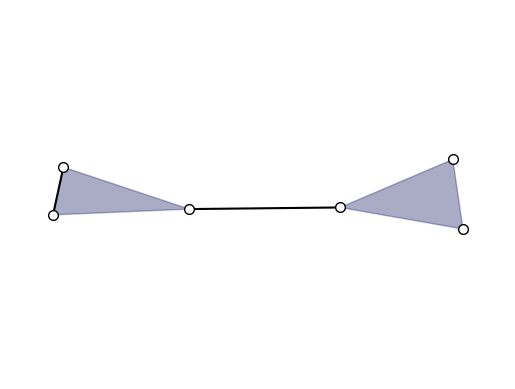

In [15]:
# https://xgi.readthedocs.io/en/latest/api/tutorials/recipes.html#8.-Plot-a-hypergraph-showing-one-order-only
# e.g H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
draw("""
1:
2:
3:
  4:
    5:
    6:""")